In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import h5py
import numpy as np

import powerbox as pbox
import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
outputs_dir = "/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/bkg/LightCones"
bkg_fn = f"{outputs_dir}/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"

In [9]:
with h5py.File(bkg_fn, 'r') as hf:
    lcfield_bkg = hf['lightcones']['brightness_temp'][()]
    ion = 1-hf['lightcones']['xH_box'][()]
lc_bkg = p21c.LightCone.read(bkg_fn)
z_s = lc_bkg.lightcone_redshifts

In [4]:
EoR_color = mpl.colors.LinearSegmentedColormap.from_list('EoR', [
    (0.0,  'yellow'),
    (0.25, 'orange'),
    (0.5,  'red'),
    (0.75, 'black'),
    (0.85, 'blue'),
    (0.95, 'cyan'),
    (1.0,  'cyan')
])
vmin, vmax = -60, 20 # 0 at 0.75
EoR_color_small = mpl.colors.LinearSegmentedColormap.from_list('EoRsmall', [
    (0.0, 'black'),
    (0.6, 'blue'),
    (1.0, 'cyan')
])

[Text(0.5, 0, 'Redshift $z$')]

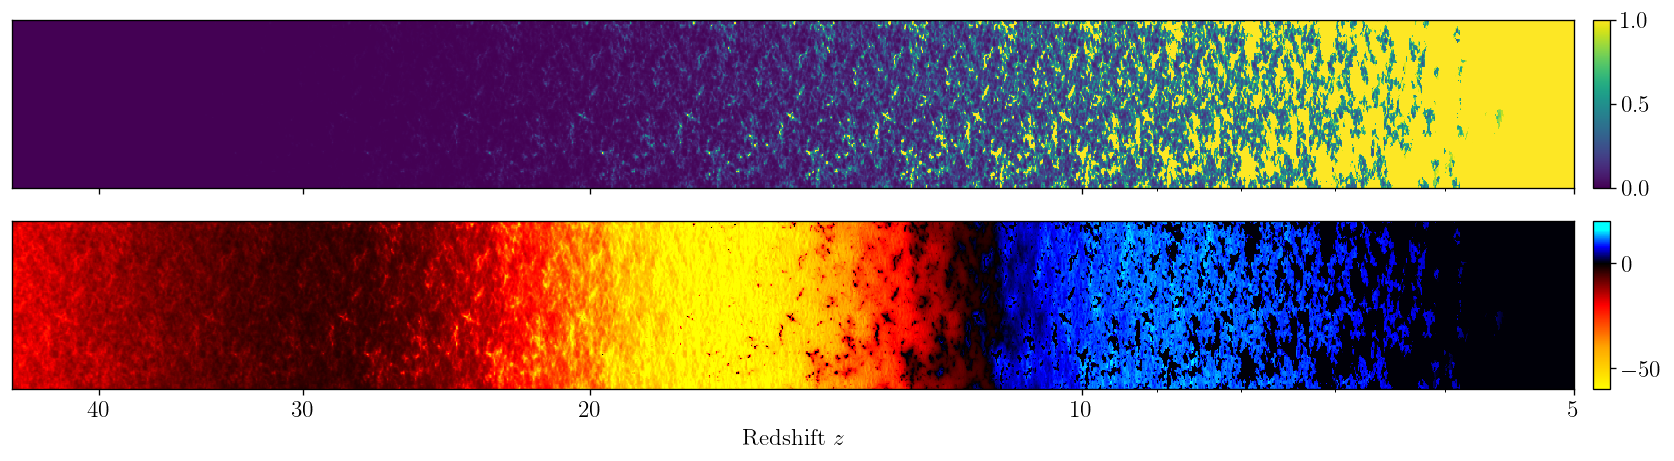

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(20, 4), sharex='col')

ax = axs[0]
im = ax.pcolormesh(z_s, np.arange(128), ion[:,0,:], cmap='viridis', vmin=0, vmax=1)
ax.set(xscale='log')
ax.set_yticks([])
fig.colorbar(im, ax=ax, aspect=10, pad=0.01)

ax = axs[1]
im = ax.pcolormesh(z_s, np.arange(128), lcfield_bkg[:,0,:], cmap=EoR_color, vmin=vmin, vmax=vmax)
ax.set(xscale='log')
fig.colorbar(im, ax=ax, aspect=10, pad=0.01)

ax.invert_xaxis()
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set_xticks([5, 10, 20, 30, 40])
ax.set_xticklabels([5, 10, 20, 30, 40])
ax.set_yticks([])

ax.set(xlabel='Redshift $z$')